In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
data= pd.read_csv("C:/Users/Dell/Desktop/python/cleaned_dataset.csv")

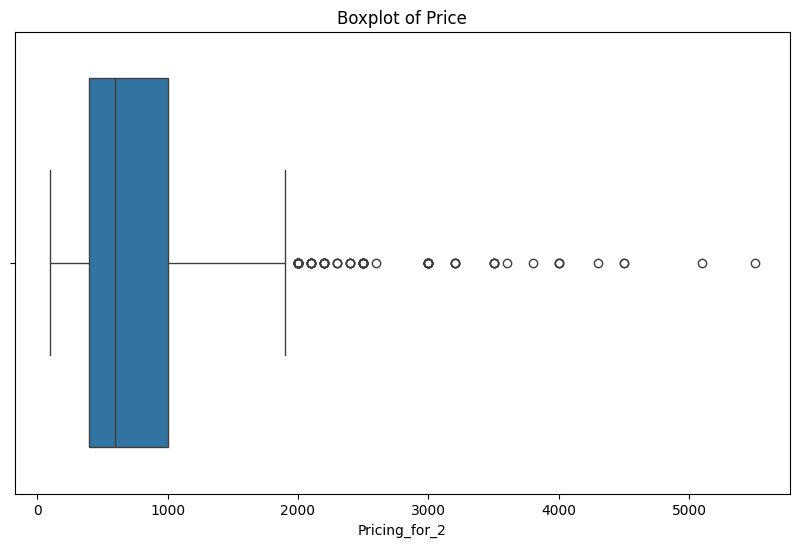

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot for a data with outliers 
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Pricing_for_2']) 
plt.title('Boxplot of Price')
plt.show()


In [4]:
from scipy import stats

#calculating the z-score 
z_scores= stats.zscore(data['Pricing_for_2'])

#creating a mask to identify outliers 
mask= (z_scores>3)|(z_scores< -3)

#removing outliers 
data_cleaned= data[~mask]

print(data_cleaned)

                    Restaurant_Name  \
0                         Cafe Lota   
1                       Burma Burma   
2                     Carnatic Cafe   
3     Cocktails & Dreams, Speakeasy   
4                 Natural Ice Cream   
...                             ...   
1400                 Bablu Chic-Inn   
1401                      Kovilakam   
1402               Krips Restaurant   
1403                       Cafe 147   
1404                       Pizzasia   

                                               Category  Pricing_for_2  \
0           Cafe, South Indian, North Indian, Beverages           1200   
1           Asian, Burmese, Bubble Tea, Desserts, Salad           1600   
2                                          South Indian            600   
3                          Nepalese, Tibetan, Beverages           2500   
4                                   Ice Cream, Desserts            400   
...                                                 ...            ...   
1400         

In [5]:
data_cleaned.shape

(1376, 9)

In [6]:
data.shape

(1405, 9)

In [7]:
data_cleaned.head()

,Restaurant_Name,Category,Pricing_for_2,Dining_Rating,Dining_Review_Count,Delivery_Rating,Delivery_Rating_Count,Known_For,Locality
0,Cafe Lota,"Cafe, South Indian, North Indian, Beverages",1200,4.9,3748,3.9,37.0,"Pondicherry Fish Curry, Coconut Rabdi, Sabudan...","Pragati Maidan, New Delhi"
1,Burma Burma,"Asian, Burmese, Bubble Tea, Desserts, Salad",1600,4.9,2636,4.4,1238.0,"Coconut Milk Dessert, Honey Caviar, Kaffir Lim...","Cyber Hub, DLF Cyber City, Gurgaon"
2,Carnatic Cafe,South Indian,600,4.9,2518,4.2,931.0,"Malleshwari Dosa, Benne Khali Dosa, Obbattu, R...","Lodhi Colony, New Delhi"
3,"Cocktails & Dreams, Speakeasy","Nepalese, Tibetan, Beverages",2500,4.9,1299,3.8,25.0,"Classic Martini, Coktails, Bloody Mary, Calama...","Sector 15, Gurgaon"
4,Natural Ice Cream,"Ice Cream, Desserts",400,4.9,4014,4.5,6969.0,"Watermelon Ice Cream, Choco Bite, Chocobite, C...","Connaught Place, New Delhi"


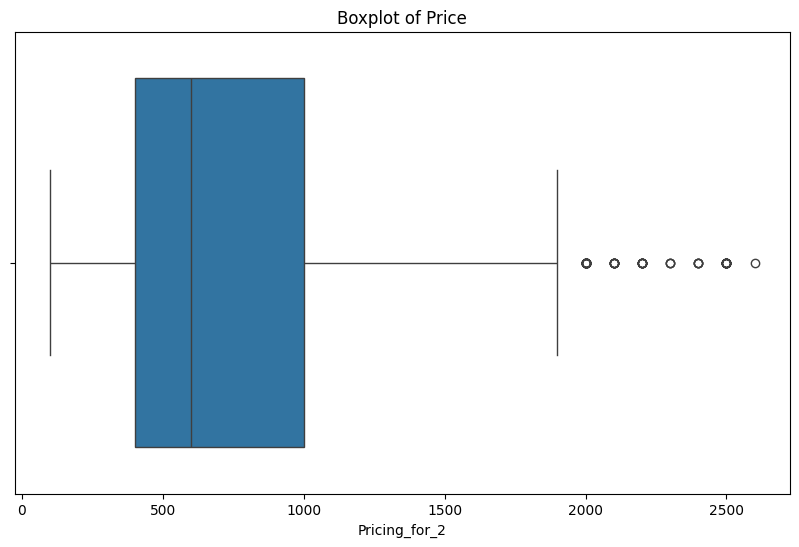

In [8]:
#boxplot for data without outliers 

plt.figure(figsize=(10, 6))
sns.boxplot(x=data_cleaned['Pricing_for_2']) 
plt.title('Boxplot of Price')
plt.show()


prediction model for dining ratings 

In [9]:
# creating datasets to split 
x= data_cleaned[['Pricing_for_2', 'Dining_Review_Count']]
y= data_cleaned['Dining_Rating']

In [10]:
#splitting the datasets into testing and training data 

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2)

In [11]:
print(x.shape, x_train.shape, x_test.shape)

(1376, 2) (1100, 2) (276, 2)


In [12]:
#training the linear regression model 

model= RandomForestRegressor(random_state= 42)

In [13]:
#fitting the model 

model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
# model evaluation

x_train_pred= model.predict(x_train)
print(x_train_pred)

[3.99033333 3.977      4.114      ... 4.225      3.99575    4.092     ]


In [15]:
#calculating the mean squared error 

mse= mean_squared_error(x_train_pred, y_train)
print(mse)

0.0033301865719012795


In [16]:
r2= r2_score(x_train_pred, y_train)
print(r2)

0.8650885639686189


In [17]:
#model evaluation on the basis of test data 

x_test_pred= model.predict(x_test)
print(x_test_pred)

[4.124      4.10833333 4.119      4.111      3.916      3.97
 4.159      3.96526667 4.158      4.22       3.9315     4.03545
 4.25       4.044      4.269      4.204      4.188      3.947
 3.974      4.053      3.98216667 4.304      3.954      4.324
 4.041      4.073      3.991      4.107      4.025      4.307
 4.05       4.02116667 3.992      3.99033333 4.044      3.9636881
 4.006      4.202      4.098      4.027      3.967      4.041
 3.999      3.99       4.317      3.92525    4.11253333 4.039
 4.055      4.007      4.144      4.462      4.163      4.007
 4.02       3.989      4.352      3.989      4.01183333 4.522
 4.06701667 4.097      4.09       4.01416667 4.457      3.93025
 3.912      4.318      3.95204365 4.002      4.134      3.9636881
 3.9596     4.313      3.974      4.25250476 4.06       4.522
 3.95266667 4.007      4.169      4.115      4.064      3.923
 4.106      4.151      4.27150476 4.115      4.28       4.246
 4.327      4.02443333 4.174      3.92408333 3.91       4.2

In [18]:
#mean squred error in terms of test data 

mse= mean_squared_error(x_test_pred, y_test)
print(mse)

0.020674712034782314


In [20]:
#prediction model 

import warnings 
warnings.filterwarnings('ignore')

input_data= [[1800, 1497]]
prediction = model.predict(input_data)
print('The predicted dining ratings are: ', prediction)

The predicted dining ratings are:  [4.537]


Prediction model for delivery ratings 

In [37]:
#creating datasets to split 

x= data_cleaned[['Pricing_for_2', 'Delivery_Rating_Count']]
y= data_cleaned['Delivery_Rating']

In [38]:
#splitting the data into training and testing data 

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2)

In [39]:
#model selection 

model= RandomForestRegressor(random_state=42)

In [40]:
#fitting the model 

model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [41]:
#evaluating the model 

x_train_pred= model.predict(x_train)
print(x_train_pred)

x_test_pred= model.predict(x_test)
print(x_test_pred)

[4.163 4.152 4.116 ... 4.008 4.057 4.148]
[4.098      4.029      3.997      4.048      3.631      3.553
 3.964      3.995      3.937      4.073      4.021      4.114
 3.981      4.158      4.062      3.992      3.875      4.01
 3.895      3.831      3.995      3.961      4.034      3.695
 3.897      3.688      3.972      4.105      4.165      4.021
 3.81       3.911      4.         4.227      3.95       3.883
 3.995      3.885      3.999      3.924      3.897      4.073
 4.06       3.89       4.099      3.717      4.027      3.92
 3.905      4.023      3.947      3.892      3.925      3.847
 3.914      3.937      4.0256     3.85441667 4.015      3.739
 4.06       4.178      4.         4.064      3.941      4.038
 3.825      4.052      4.109      4.021      3.998      4.041
 3.884      3.882      3.671      4.         3.91       3.998
 4.042      4.167      4.138      3.788      3.95       4.062
 3.862      4.104      4.157      3.928      4.         4.022
 3.963      4.213      4.104  

In [42]:
#calculation mean squared error for training data 

mse= mean_squared_error(x_train_pred, y_train)
print(mse)

0.008267825493434317


In [43]:
#calculating r2 score for training data 

r2= r2_score(x_train_pred, y_train)
print(r2)

0.659696887214796


In [44]:
#calculation mean squared error for testing data 

mse= mean_squared_error(x_test_pred, y_test)
print(mse)

0.061103338873792344


In [46]:
#prediction 

import warnings 
warnings.filterwarnings('ignore')

input= [[1800, 790.0]]
prediction = model.predict(input)
print('The value of predicted dining ratings is: ', prediction )

The value of predicted dining ratings is:  [4.219]
